# NOTEBOOK 3: REGRESSION ON DIABETES DATA SET
### Team 3
- Anjali Sebastian
- Yesha Sharma
- Rupansh Phutela

### What this Notebook does?
After Data selection, cleaning, pre-processing and EDA, we will now look at how we can perform continuous variable estimation, i.e. Regression. Based on feedback, we have carried out the below:
 - Normalization of entire dataset due to varying ranges of different attributes
 - Correlation analysis, Pairplots and heatmaps with normalized data.
 - Attribute selection for regression models
 - Regression models for 5 combinations
 - Performance Evaluation Metrics
 - Polynomial Regression with/without regularization
 - Decision Tree Regression (Max Depth = 2,3,5,7)
 - Conclusion

### 1. Import Packages 

In [1]:
# you need   Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
##############################################

### 2. Read Data and Display

In [4]:
diabetes = pd.read_csv('./diabetes.csv')

In [5]:
diabetes.head()

,Unnamed: 0,Diabetes,BMI,State,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,0,0.0,28.17,AL,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,3.0,15.0,0.0,1.0,0.0,13.0,3.0,3.0
1,1,0.0,18.54,AL,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,2.0,10.0,0.0,0.0,0.0,11.0,5.0,5.0
2,2,1.0,31.62,AL,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,3.0,0.0,30.0,1.0,0.0,10.0,6.0,7.0
3,6,1.0,32.98,AL,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,4.0,30.0,0.0,1.0,1.0,11.0,6.0,7.0
4,9,1.0,16.65,AL,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,20.0,0.0,1.0,0.0,11.0,2.0,3.0


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243317 entries, 0 to 243316
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         243317 non-null  int64  
 1   Diabetes           243317 non-null  float64
 2   BMI                243317 non-null  float64
 3   State              243317 non-null  object 
 4   HighBP             243317 non-null  float64
 5   HighChol           243317 non-null  float64
 6   CholCheck          243317 non-null  float64
 7   FruitConsume       243317 non-null  float64
 8   VegetableConsume   243317 non-null  float64
 9   Smoker             243317 non-null  float64
 10  HeavyDrinker       243317 non-null  float64
 11  Stroke             243317 non-null  float64
 12  HeartDisease       243317 non-null  float64
 13  Healthcare         243317 non-null  float64
 14  NoDoctorDueToCost  243317 non-null  float64
 15  PhysicalActivity   243317 non-null  float64
 16  Ge

In [7]:
#set datatypes of columns to boolean or categorical as appropriate
make_bool_int = ['Diabetes','HighBP','HighChol','CholCheck',\
             'FruitConsume','VegetableConsume','Smoker','HeavyDrinker','Stroke','HeartDisease',\
             'Healthcare','NoDoctorDueToCost','PhysicalActivity','DifficultyWalking','Gender']
make_categorical_int = ['GeneralHealth','Age','Education','Income']

In [8]:
#drop the extra index column in datafram
diabetes=diabetes.drop(['Unnamed: 0'], axis=1)

#drop the state column in dataframe since it will not be used in the dataframe
diabetes=diabetes.drop(['State'], axis=1)

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243317 entries, 0 to 243316
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes           243317 non-null  float64
 1   BMI                243317 non-null  float64
 2   HighBP             243317 non-null  float64
 3   HighChol           243317 non-null  float64
 4   CholCheck          243317 non-null  float64
 5   FruitConsume       243317 non-null  float64
 6   VegetableConsume   243317 non-null  float64
 7   Smoker             243317 non-null  float64
 8   HeavyDrinker       243317 non-null  float64
 9   Stroke             243317 non-null  float64
 10  HeartDisease       243317 non-null  float64
 11  Healthcare         243317 non-null  float64
 12  NoDoctorDueToCost  243317 non-null  float64
 13  PhysicalActivity   243317 non-null  float64
 14  GeneralHealth      243317 non-null  float64
 15  PhysicalHealth     243317 non-null  float64
 16  Me

### 3. Normalize data  

In [10]:
# Using MinMaxScaler to normalize the data

from sklearn.preprocessing import MinMaxScaler
diabetes_norm =diabetes.copy(deep=True)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

diabetes_norm.iloc[:,:] = minmax_scaler.fit_transform(diabetes_norm)
diabetes_norm.head()

,Diabetes,BMI,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
0,0.0,0.186505,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.50,0.500000,0.0,1.0,0.0,1.000000,0.4,0.285714
1,0.0,0.075433,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.25,0.333333,0.0,0.0,0.0,0.833333,0.8,0.571429
2,1.0,0.226298,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.50,0.000000,1.0,1.0,0.0,0.750000,1.0,0.857143
3,1.0,0.241984,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.75,1.000000,0.0,1.0,1.0,0.833333,1.0,0.857143
4,1.0,0.053633,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00,0.666667,0.0,1.0,0.0,0.833333,0.2,0.285714


In [11]:
diabetes_norm.describe()

,Diabetes,BMI,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
count,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,...,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000,243317.000000
mean,0.145074,0.192309,0.425683,0.388292,0.962913,0.630293,0.821673,0.426242,0.062906,0.043589,...,0.093861,0.752985,0.609973,0.146748,0.122449,0.168061,0.469573,0.578773,0.814702,0.733314
std,0.352176,0.073837,0.494447,0.487363,0.188976,0.482726,0.382789,0.494531,0.242794,0.204180,...,0.291636,0.431277,0.265101,0.294392,0.260082,0.373921,0.499074,0.272755,0.194981,0.294669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.142330,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.000000,0.178316,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,0.000000,0.229181,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.750000,0.100000,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# write to file 
# run only once 
#diabetes_norm.to_csv("./diabetes_normalized.csv")

### 4 Exploratory Data Analysis with Normalized Data

#### 4.1 Pairplots 

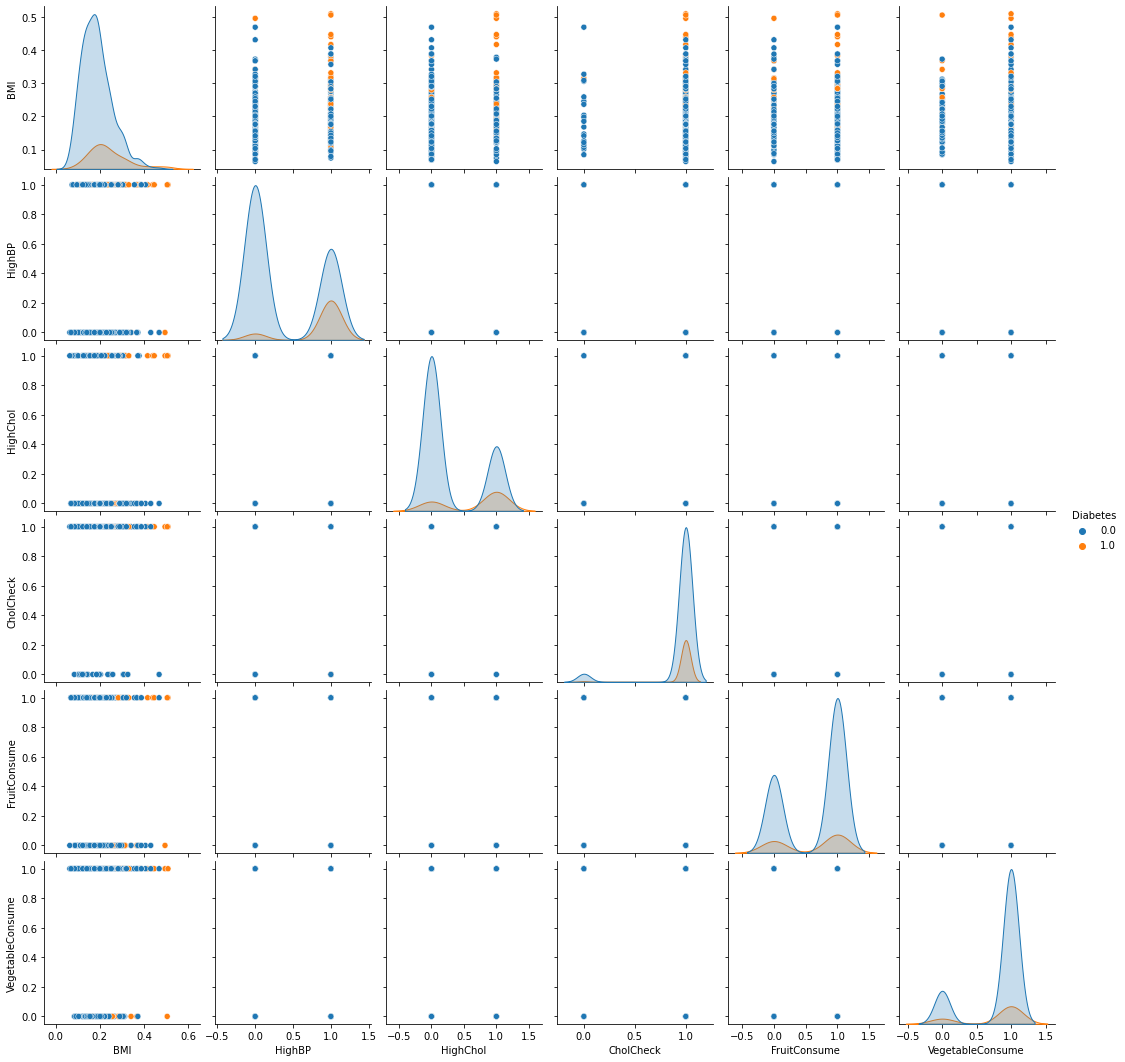

In [13]:
# trying different color schemes
palette = sns.color_palette("bright")

#sampling a random number of values since plotting all 0.2 million datapoints will make the plot unreadable
number_of_samples = 500
diabetes_norm_sample = diabetes_norm.sample(number_of_samples)
df_plot =diabetes_norm_sample.iloc[:,:7]
sns.pairplot(df_plot, hue='Diabetes', plot_kws={'alpha':1})

Notes: We see a small relation between cholcheck, BMI with respect to diabetes. All Diabetes instances seem to occur only on the second line which is Mid level BMI which Cholcheck as 1. We will use it for classification.

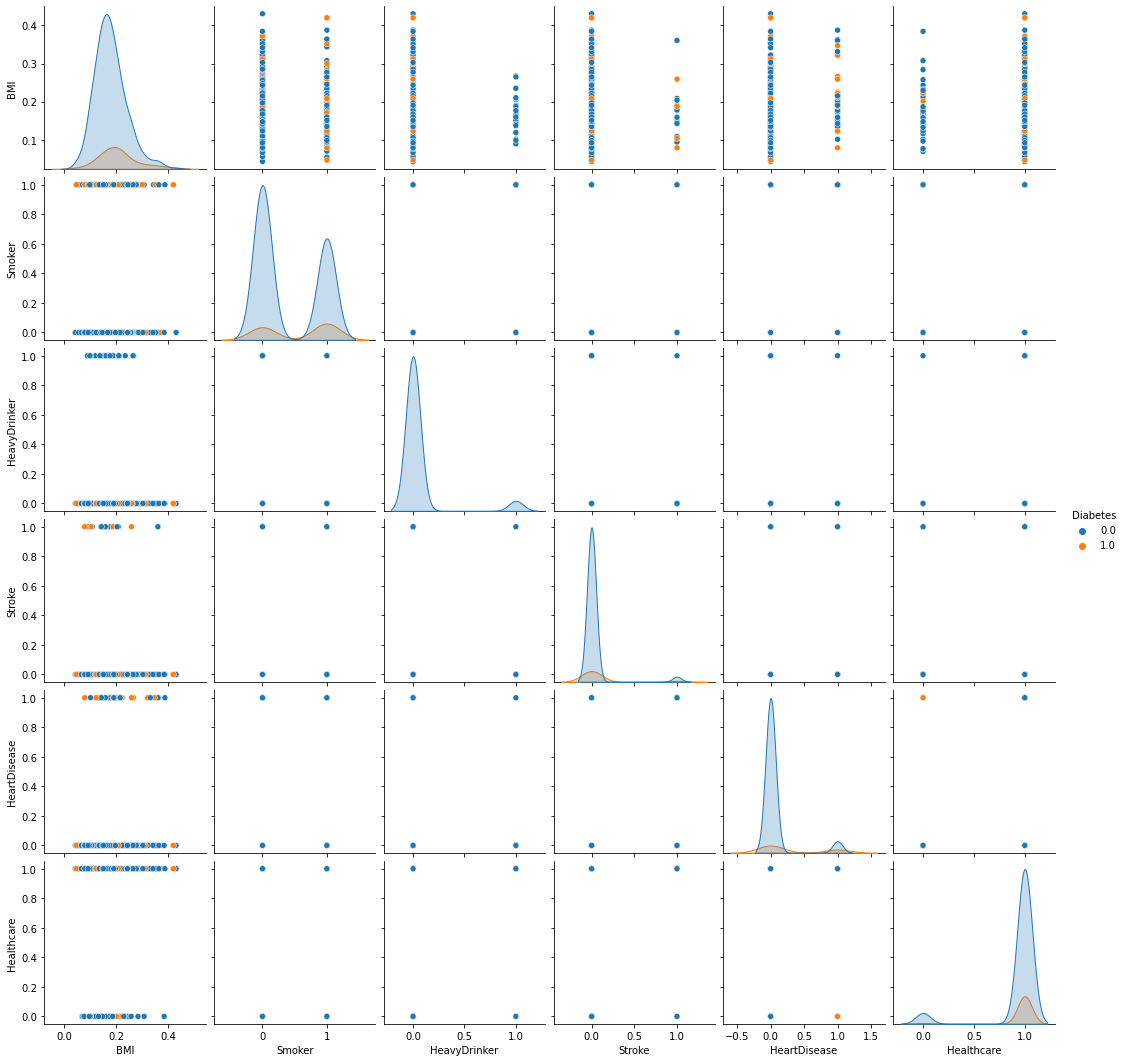

In [14]:
#sampling a random number of values since plotting all 0.2 million datapoints will make the plot unreadable
number_of_samples = 500
diabetes_norm_sample = diabetes_norm.sample(number_of_samples)
df_plot =diabetes_norm_sample.iloc[:,[0,1,7,8,9,10,11]]
sns.pairplot(df_plot, hue='Diabetes', plot_kws={'alpha':1})

Notes: For the plots of smoker, heavy drinker, stroke, heartdisease and health care we see that orange dots (occurance of Diabetes ) is much higher at the higher BMI levels. 

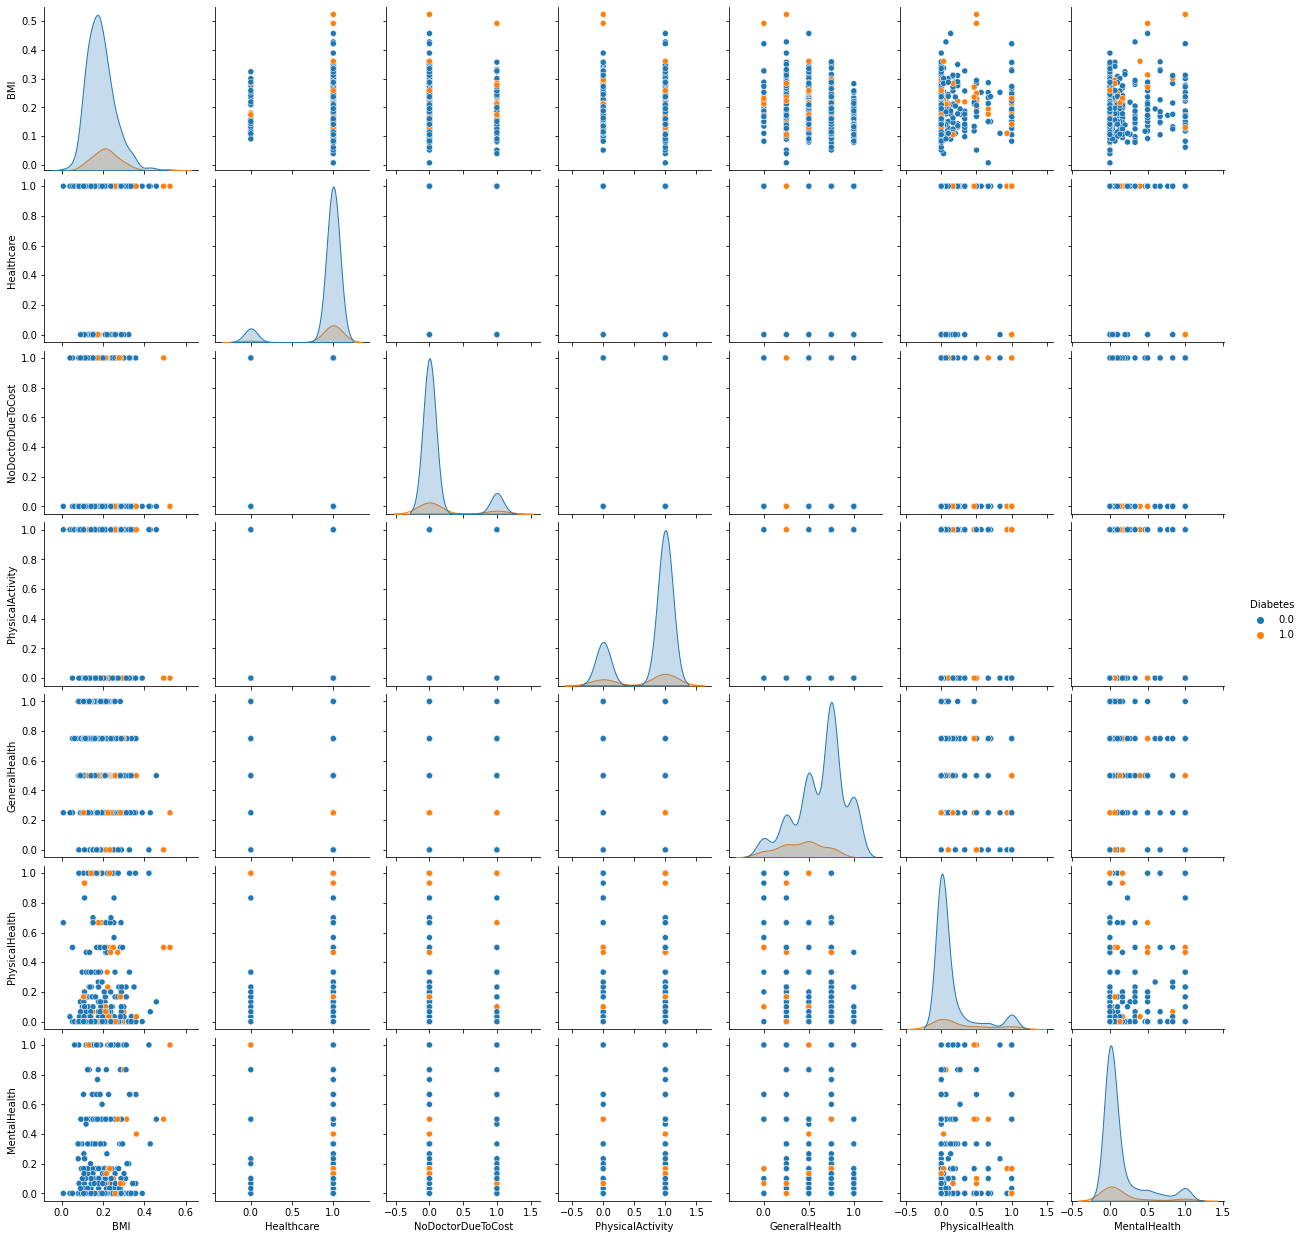

In [15]:
#sampling a random number of values since plotting all 0.2 million datapoints will make the plot unreadable
number_of_samples = 500
diabetes_norm_sample = diabetes_norm.sample(number_of_samples)
df_plot =diabetes_norm_sample.iloc[:,[0,1,11,12,13,14,15,16]]
sns.pairplot(df_plot, hue='Diabetes', plot_kws={'alpha':1})

Notes. There appears to be an none linear realtionship between the following
1. GeneralHealth - BMI (looks like a parabola)
2. PhysicalHealth - BMI (Maybe some curve)
3. MentalHealth - BMI (Maybe some curve)


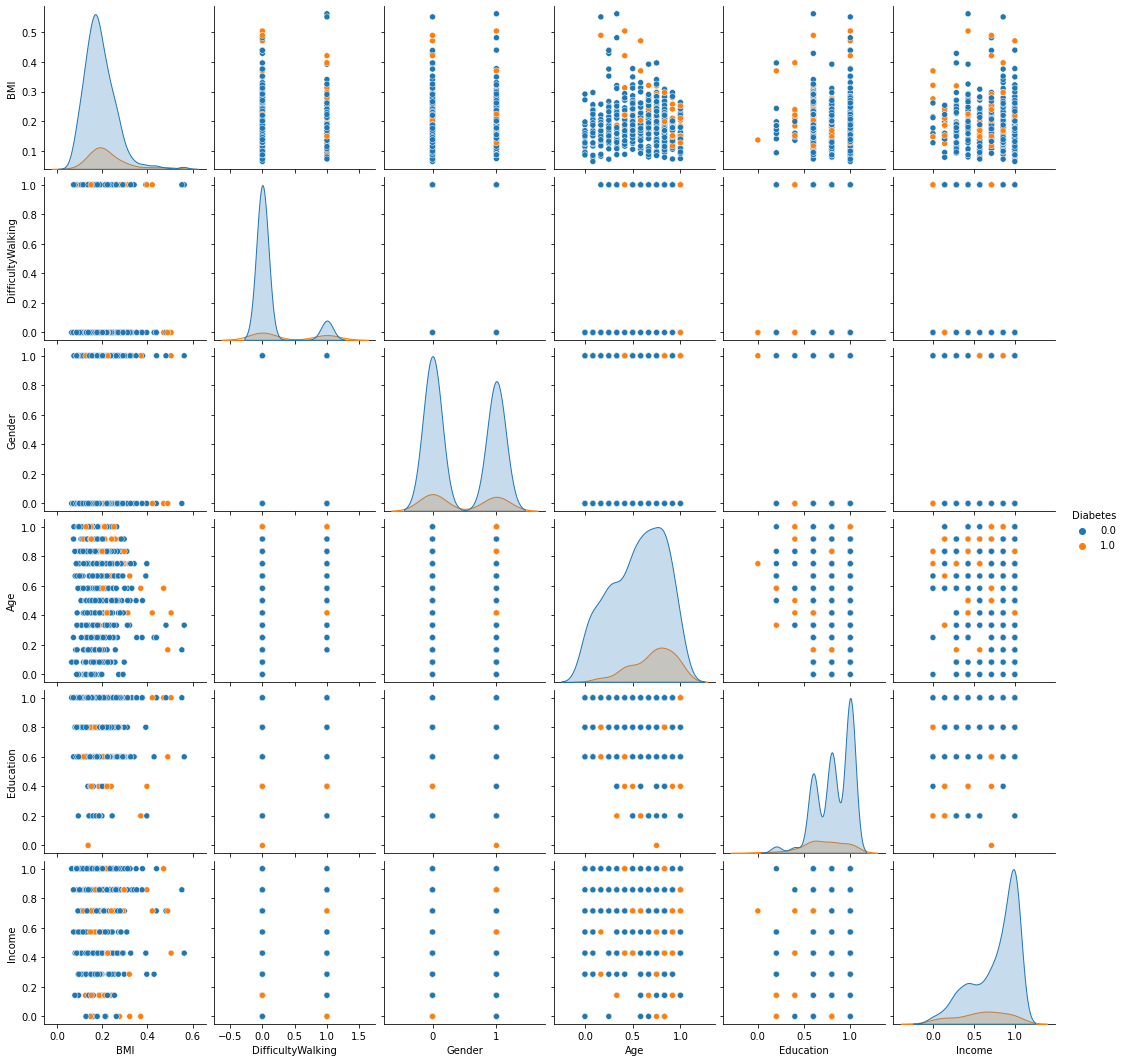

In [16]:
#sampling a random number of values since plotting all 0.2 million datapoints will make the plot unreadable
number_of_samples = 500
diabetes_norm_sample = diabetes_norm.sample(number_of_samples)
df_plot =diabetes_norm_sample.iloc[:,[0,1,17,18,19,20,21]]
sns.pairplot(df_plot, hue='Diabetes', plot_kws={'alpha':1})

Notes : Age - BMI is showing a polynomial (parabola) relation

#### 4.2 Correlation Matrix

In [17]:
diabetes_norm.corr()

,Diabetes,BMI,HighBP,HighChol,CholCheck,FruitConsume,VegetableConsume,Smoker,HeavyDrinker,Stroke,...,NoDoctorDueToCost,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education,Income
Diabetes,1.000000,0.214406,0.264480,0.206304,0.068309,-0.029148,-0.039670,0.057439,-0.061356,0.111758,...,0.018799,-0.122594,-0.284712,0.173316,0.053553,0.216740,0.030739,0.193115,-0.110472,-0.149129
BMI,0.214406,1.000000,0.220077,0.102515,0.034871,-0.087788,-0.046691,0.013430,-0.040612,0.017064,...,0.047957,-0.143925,-0.250105,0.123211,0.083946,0.197330,0.017796,-0.029011,-0.094184,-0.080907
HighBP,0.264480,0.220077,1.000000,0.303605,0.100565,-0.026848,-0.033193,0.098756,-0.005050,0.135123,...,-0.001732,-0.113580,-0.280748,0.159268,0.038884,0.222005,0.056070,0.349149,-0.107000,-0.136702
HighChol,0.206304,0.102515,0.303605,1.000000,0.095806,-0.025939,-0.021524,0.086088,-0.013900,0.097751,...,-0.001932,-0.068055,-0.194416,0.122674,0.042723,0.145126,0.022587,0.286603,-0.036451,-0.057267
CholCheck,0.068309,0.034871,0.100565,0.095806,1.000000,0.032427,0.018282,-0.016649,-0.031740,0.027305,...,-0.080688,0.012704,-0.033767,0.030213,-0.017127,0.044470,-0.043166,0.107531,0.030458,0.024746
FruitConsume,-0.029148,-0.087788,-0.026848,-0.025939,0.032427,1.000000,0.218223,-0.075698,-0.038302,-0.003581,...,-0.043225,0.123372,0.094812,-0.045607,-0.075855,-0.037295,-0.058908,0.083583,0.097824,0.070095
VegetableConsume,-0.039670,-0.046691,-0.033193,-0.021524,0.018282,0.218223,1.000000,-0.011862,0.014879,-0.023225,...,-0.033074,0.127687,0.107386,-0.055045,-0.055464,-0.065750,-0.053810,0.022613,0.133771,0.146915
Smoker,0.057439,0.013430,0.098756,0.086088,-0.016649,-0.075698,-0.011862,1.000000,0.102515,0.061635,...,0.055440,-0.079384,-0.172702,0.122506,0.099937,0.121155,0.085604,0.117582,-0.167054,-0.126273
HeavyDrinker,-0.061356,-0.040612,-0.005050,-0.013900,-0.031740,-0.038302,0.014879,0.102515,1.000000,-0.021902,...,0.016157,0.014397,0.024280,-0.020779,0.035766,-0.036412,0.006503,-0.052640,0.014218,0.046114
Stroke,0.111758,0.017064,0.135123,0.097751,0.027305,-0.003581,-0.023225,0.061635,-0.021902,1.000000,...,0.025504,-0.072490,-0.173373,0.146217,0.066105,0.180473,0.005716,0.131658,-0.066517,-0.125590


In [18]:
temp = diabetes_norm.corr()
temp.iloc[:,13:21]

,PhysicalActivity,GeneralHealth,PhysicalHealth,MentalHealth,DifficultyWalking,Gender,Age,Education
Diabetes,-0.122594,-0.284712,0.173316,0.053553,0.216740,0.030739,0.193115,-0.110472
BMI,-0.143925,-0.250105,0.123211,0.083946,0.197330,0.017796,-0.029011,-0.094184
HighBP,-0.113580,-0.280748,0.159268,0.038884,0.222005,0.056070,0.349149,-0.107000
HighChol,-0.068055,-0.194416,0.122674,0.042723,0.145126,0.022587,0.286603,-0.036451
CholCheck,0.012704,-0.033767,0.030213,-0.017127,0.044470,-0.043166,0.107531,0.030458
FruitConsume,0.123372,0.094812,-0.045607,-0.075855,-0.037295,-0.058908,0.083583,0.097824
VegetableConsume,0.127687,0.107386,-0.055045,-0.055464,-0.065750,-0.053810,0.022613,0.133771
Smoker,-0.079384,-0.172702,0.122506,0.099937,0.121155,0.085604,0.117582,-0.167054
HeavyDrinker,0.014397,0.024280,-0.020779,0.035766,-0.036412,0.006503,-0.052640,0.014218
Stroke,-0.072490,-0.173373,0.146217,0.066105,0.180473,0.005716,0.131658,-0.066517


<AxesSubplot:>

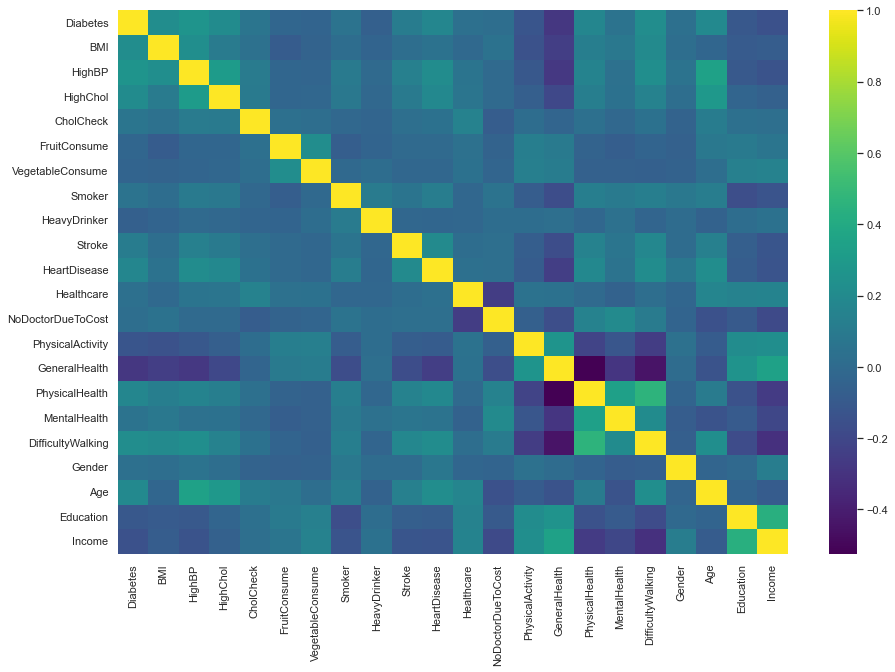

In [19]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(diabetes_norm.corr(), annot=False, vmax=1, cmap='viridis', square=False)

Notes: Looking at the heatmap we see that the highest linear  correlation is between
1. Physical Health  -  General Health
2. Physical Activity - Physical Health
3. Difficulty Walking - General Health
4. Difficulty Walking - Physical Health
5. Education - Income
<br> We will try to make linear regression model for some of these relations 

### 5. LINEAR REGRESSION - simple linear regression function with a scatter plot
Based on the scatter plots and correlation calculations we will do simple linear regression for feature with best correlation value. We will non-normalized and normalized values to see the difference.
1. Physical Health - General Health
2. GeneralHealth - BMI
3. Age - BMI
4. DifficultyWalking - GeneralHealth
5. PhyscialHealth - BMI

In [20]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243317 entries, 0 to 243316
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes           243317 non-null  float64
 1   BMI                243317 non-null  float64
 2   HighBP             243317 non-null  float64
 3   HighChol           243317 non-null  float64
 4   CholCheck          243317 non-null  float64
 5   FruitConsume       243317 non-null  float64
 6   VegetableConsume   243317 non-null  float64
 7   Smoker             243317 non-null  float64
 8   HeavyDrinker       243317 non-null  float64
 9   Stroke             243317 non-null  float64
 10  HeartDisease       243317 non-null  float64
 11  Healthcare         243317 non-null  float64
 12  NoDoctorDueToCost  243317 non-null  float64
 13  PhysicalActivity   243317 non-null  float64
 14  GeneralHealth      243317 non-null  float64
 15  PhysicalHealth     243317 non-null  float64
 16  Me

In [21]:
# split the normalized data into train and test parts
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(diabetes,shuffle = True, test_size = 0.20, random_state=17)
train_norm_df, test_norm_df = train_test_split(diabetes_norm,shuffle = True, test_size = 0.20, random_state=17)

#### LINEAR REGRESSION  MODEL 1 : Physical Health  -  General Health

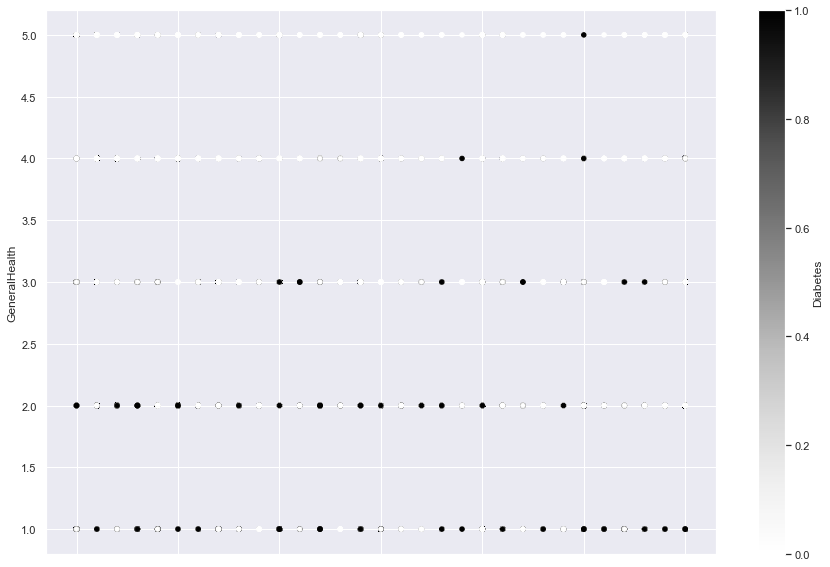

In [22]:
ax1 = diabetes.plot.scatter(x='PhysicalHealth',
                      y='GeneralHealth',
                      c='Diabetes')
plt.show()

The model Score is  0.2770993178421167


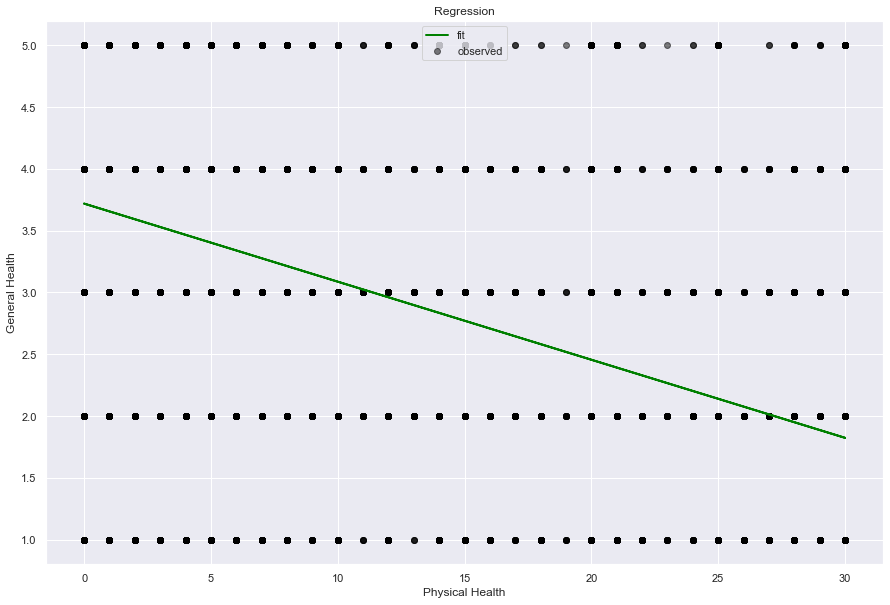

Coefficients =   [-0.06319487]
Intercept =   3.719167088813741
Mean squared error = 0.82
Coefficient of determination = 0.27


In [23]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Simple Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score


X= train_df[['PhysicalHealth']]
y= train_df['GeneralHealth']

X_test = test_df[['PhysicalHealth']]
y_test = test_df['GeneralHealth']

X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X2, y)

# Model score
r_sq = model_1.score(X2, y)
print("The model Score is ", r_sq)

# Plotting the Regression Line with Scatter plot 
plt.scatter(X2, y, color='black', label='observed',alpha=0.5)
plt.plot(X2, model_1.predict(X2), label='fit', color='Green', linewidth=2)
plt.xlabel('Physical Health')
plt.ylabel('General Health')
plt.title('Regression')
plt.legend(loc='best')

plt.show()


# Make predictions using the testing set
diabetes_y_pred = model_1.predict(X_test)

# The coefficients
print('Coefficients =  ', model_1.coef_)
print('Intercept =  ', model_1.intercept_)

# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, diabetes_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, diabetes_y_pred)))

In [24]:
# Make a prediction
X3= test_df['PhysicalHealth']
 
X3= np.array(X3).reshape(-1,1)
# what is the price for element 44 of the test house age list. 
predicted_charge = model_1.predict([X3[44]])
print('Physical Health = {:.2f}   Predicted GeneralHealth = {:.2f}'.format(X3[44][0], predicted_charge[0]))

Physical Health = 2.00   Predicted GeneralHealth = 3.59


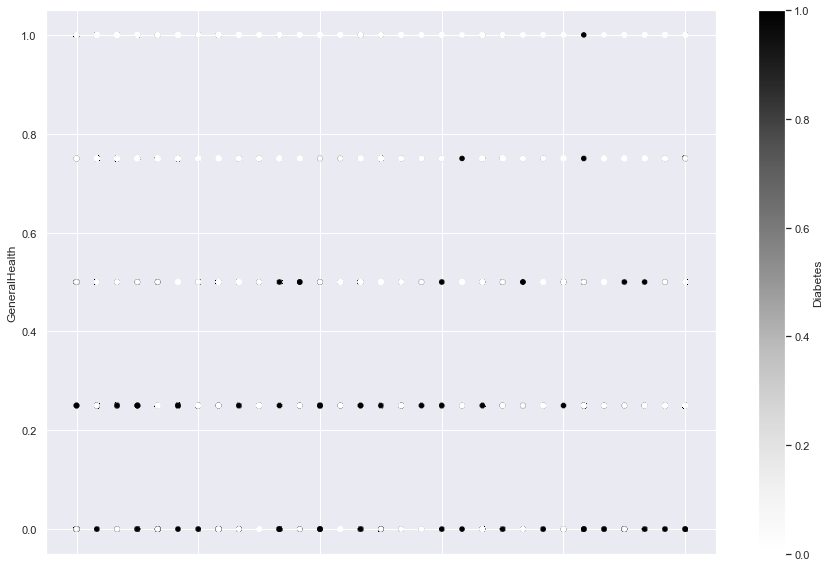

In [25]:
ax1 = diabetes_norm.plot.scatter(x='PhysicalHealth',
                      y='GeneralHealth',
                      c='Diabetes')
plt.show()

The model Score is  0.2770993178421166


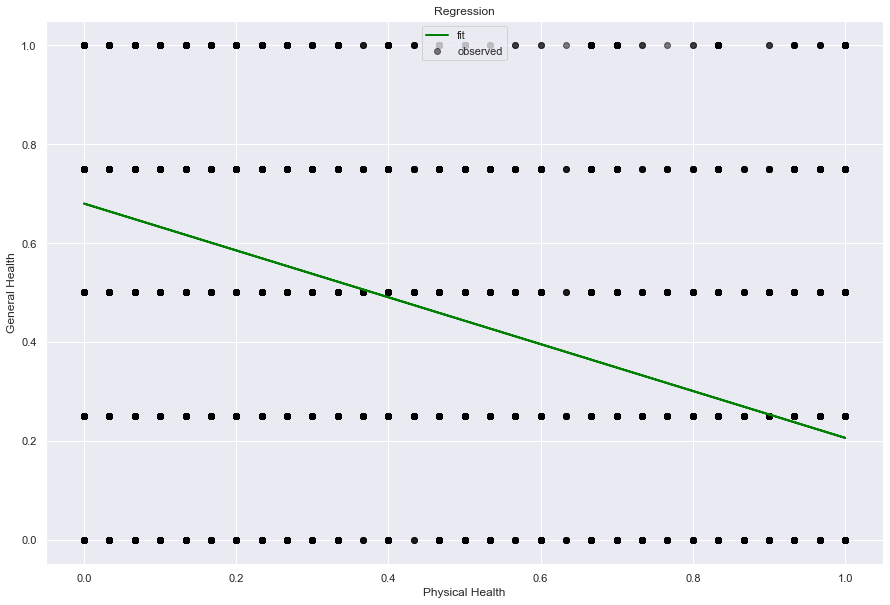

Coefficients =   [-0.4739615]
Intercept =   0.6797917722034564
Mean squared error = 0.05
Coefficient of determination = 0.27


In [26]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Simple Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score


X= train_norm_df[['PhysicalHealth']]
y= train_norm_df['GeneralHealth']

X_test = test_norm_df[['PhysicalHealth']]
y_test = test_norm_df['GeneralHealth']

X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X2, y)

# Model score
r_sq = model_1.score(X2, y)
print("The model Score is ", r_sq)

# Plotting the Regression Line with Scatter plot 
plt.scatter(X2, y, color='black', label='observed',alpha=0.5)
plt.plot(X2, model_1.predict(X2), label='fit', color='Green', linewidth=2)
plt.xlabel('Physical Health')
plt.ylabel('General Health')
plt.title('Regression')
plt.legend(loc='best')

plt.show()


# Make predictions using the testing set
diabetes_y_pred = model_1.predict(X_test)

# The coefficients
print('Coefficients =  ', model_1.coef_)
print('Intercept =  ', model_1.intercept_)

# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, diabetes_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, diabetes_y_pred)))

### LINEAR REGRESSION MODEL 2 :  General Health - BMI

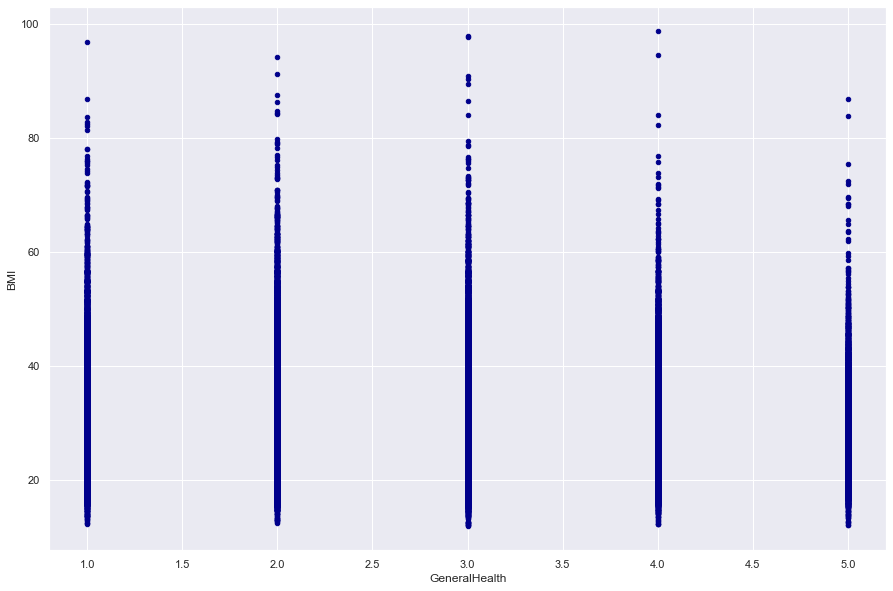

In [27]:
ax1 = diabetes.plot.scatter(x='GeneralHealth',
                      y='BMI',
                      c='DarkBlue')
plt.show()

The model Score is  0.06349070218338293


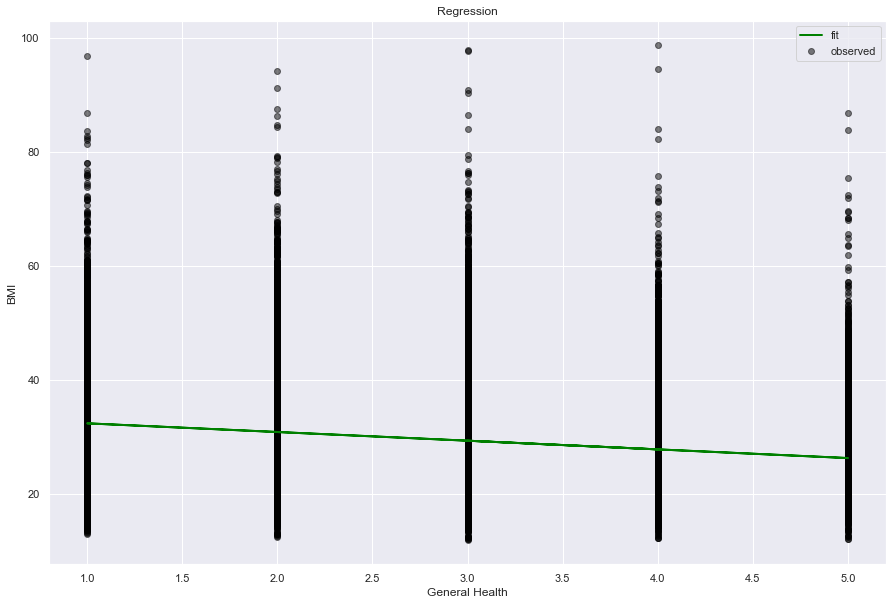

Coefficients =   [-1.52366017]
Intercept =   33.9206035093744
Mean squared error = 37.94
Coefficient of determination = 0.06


In [28]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Simple Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score


X= train_df[['GeneralHealth']]
y= train_df['BMI']

X_test = test_df[['GeneralHealth']]
y_test = test_df['BMI']

X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X2, y)

# Model score
r_sq = model_1.score(X2, y)
print("The model Score is ", r_sq)

# Plotting the Regression Line with Scatter plot 
plt.scatter(X2, y, color='black', label='observed',alpha=0.5)
plt.plot(X2, model_1.predict(X2), label='fit', color='Green', linewidth=2)
plt.xlabel('General Health')
plt.ylabel('BMI')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

# Make predictions using the testing set
diabetes_y_pred = model_1.predict(X_test)

# The coefficients
print('Coefficients =  ', model_1.coef_)
print('Intercept =  ', model_1.intercept_)

# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, diabetes_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, diabetes_y_pred)))

In [29]:
# Make a prediction
X3= test_df['GeneralHealth']
 
X3= np.array(X3).reshape(-1,1)
# what is the price for element 44 of the test house age list. 
predicted_charge = model_1.predict([X3[44]])
print('General Health = {:.2f}   Predicted BMI = {:.2f}'.format(X3[44][0], predicted_charge[0]))

General Health = 2.00   Predicted BMI = 30.87


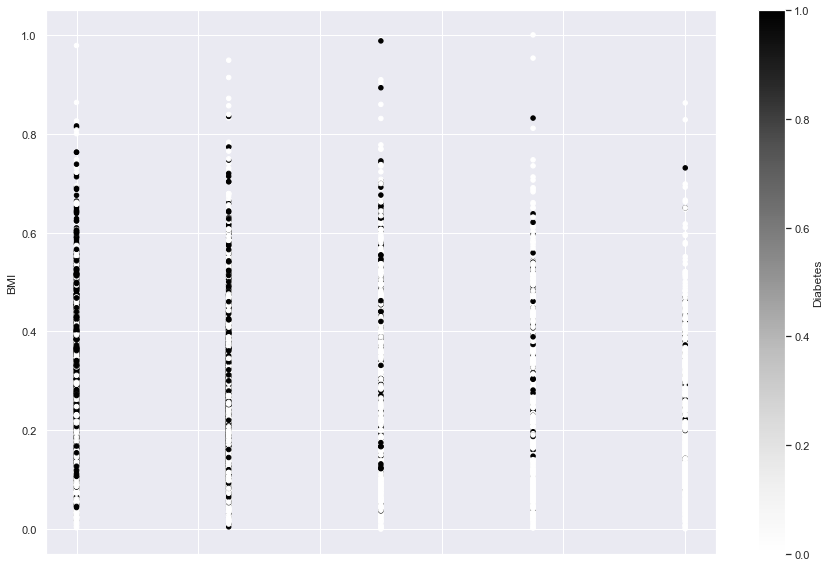

In [30]:
ax1 = diabetes_norm.plot.scatter(x='GeneralHealth',
                      y='BMI',
                      c='Diabetes')
plt.show()

The model Score is  0.06349070218338293


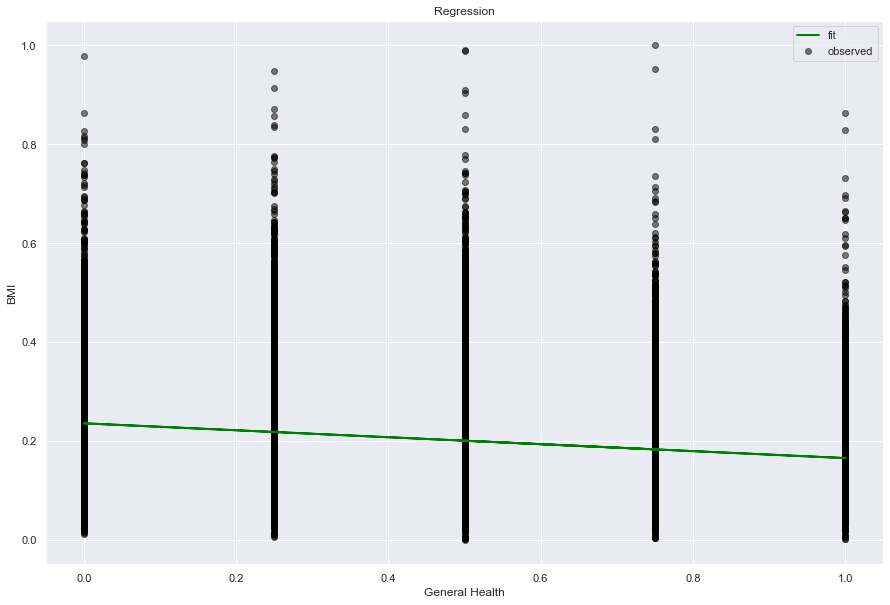

Coefficients =   [-0.07029574]
Intercept =   0.2352588619911028
Mean squared error = 0.01
Coefficient of determination = 0.06


In [31]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Simple Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score


X= train_norm_df[['GeneralHealth']]
y= train_norm_df['BMI']

X_test = test_norm_df[['GeneralHealth']]
y_test = test_norm_df['BMI']

X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X2, y)

# Model score
r_sq = model_1.score(X2, y)
print("The model Score is ", r_sq)

# Plotting the Regression Line with Scatter plot 
plt.scatter(X2, y, color='black', label='observed',alpha=0.5)
plt.plot(X2, model_1.predict(X2), label='fit', color='Green', linewidth=2)
plt.xlabel('General Health')
plt.ylabel('BMI')
plt.title('Regression')
plt.legend(loc='best')

plt.show()


# Make predictions using the testing set
diabetes_y_pred = model_1.predict(X_test)

# The coefficients
print('Coefficients =  ', model_1.coef_)
print('Intercept =  ', model_1.intercept_)

# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, diabetes_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, diabetes_y_pred)))

In [32]:
# # Make a prediction
# X3= test_df['GeneralHealth']
 
# X3= np.array(X3).reshape(-1,1)
# # what is the price for element 44 of the test house age list. 
# predicted_charge = model_1.predict([X3[44]])
# print('General Health = {:.2f}   Predicted BMI = {:.2f}'.format(X3[44][0], predicted_charge[0]))

### LINEAR REGRESSION MODEL 3 : Age - BMI

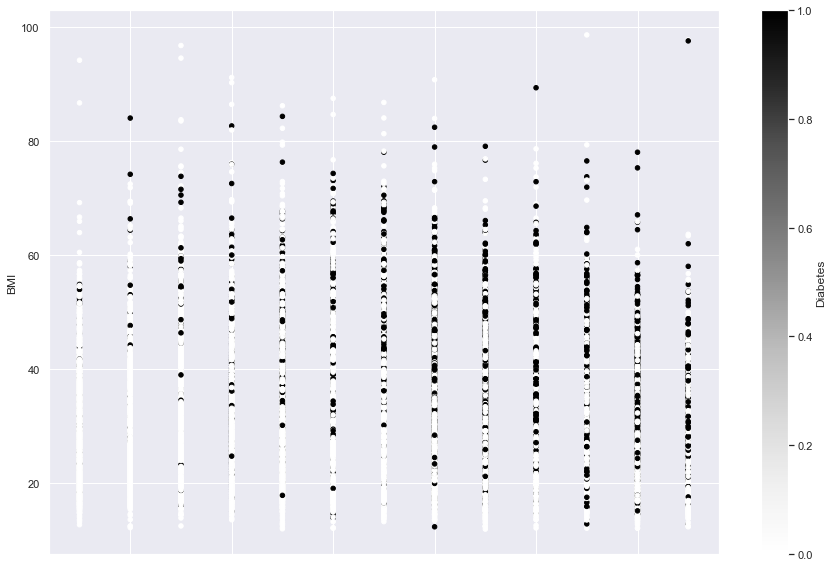

In [33]:
ax1 = diabetes.plot.scatter(x='Age',
                      y='BMI',
                      c='Diabetes')
plt.show()

The model Score is  0.0008194515136238367


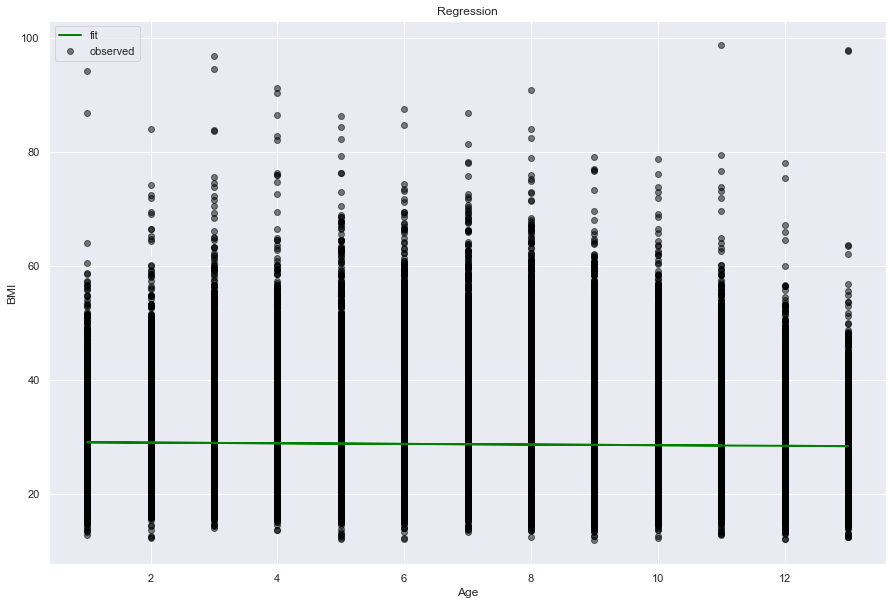

Coefficients =   [-0.05612752]
Intercept =   29.124165356215567
Mean squared error = 40.27
Coefficient of determination = 0.00


In [34]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Simple Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score


X= train_df[['Age']]
y= train_df['BMI']

X_test = test_df[['Age']]
y_test = test_df['BMI']

X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X2, y)

# Model score
r_sq = model_1.score(X2, y)
print("The model Score is ", r_sq)

# Plotting the Regression Line with Scatter plot 
plt.scatter(X2, y, color='black', label='observed',alpha=0.5)
plt.plot(X2, model_1.predict(X2), label='fit', color='Green', linewidth=2)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Regression')
plt.legend(loc='best')

plt.show()


# Make predictions using the testing set
diabetes_y_pred = model_1.predict(X_test)

# The coefficients
print('Coefficients =  ', model_1.coef_)
print('Intercept =  ', model_1.intercept_)

# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, diabetes_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, diabetes_y_pred)))

In [35]:
# Make a prediction
X3= test_df['Age']
 
X3= np.array(X3).reshape(-1,1)
# what is the price for element 44 of the test house age list. 
predicted_charge = model_1.predict([X3[44]])
print('Age Class = {:.2f}   Predicted BMI = {:.2f}'.format(X3[44][0], predicted_charge[0]))

Age Class = 3.00   Predicted BMI = 28.96


### LINEAR REGRESSION MODEL 4 : Difficulty Walking - General Health

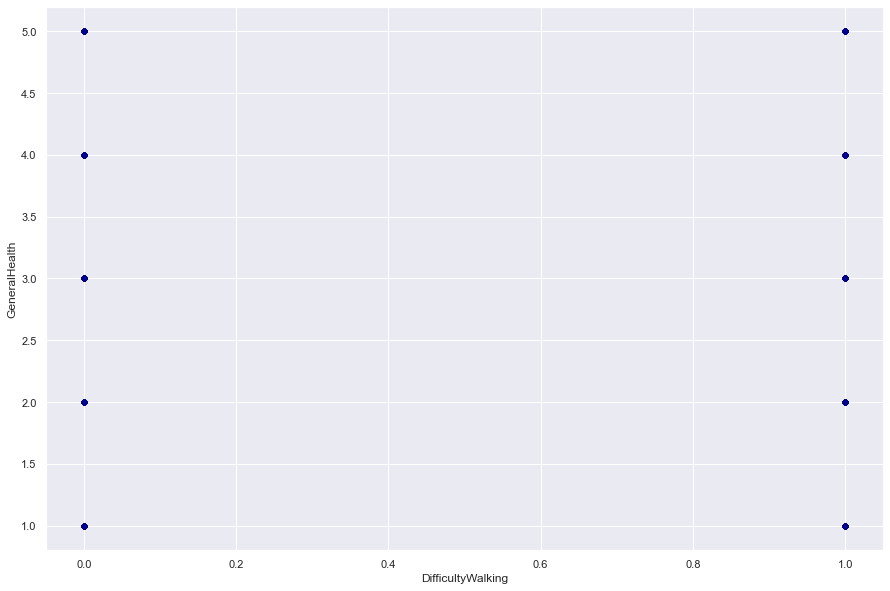

In [36]:
ax1 = diabetes.plot.scatter(x='DifficultyWalking',
                      y='GeneralHealth',
                      c='Darkblue')
plt.show()

The model Score is  0.19895907559493897


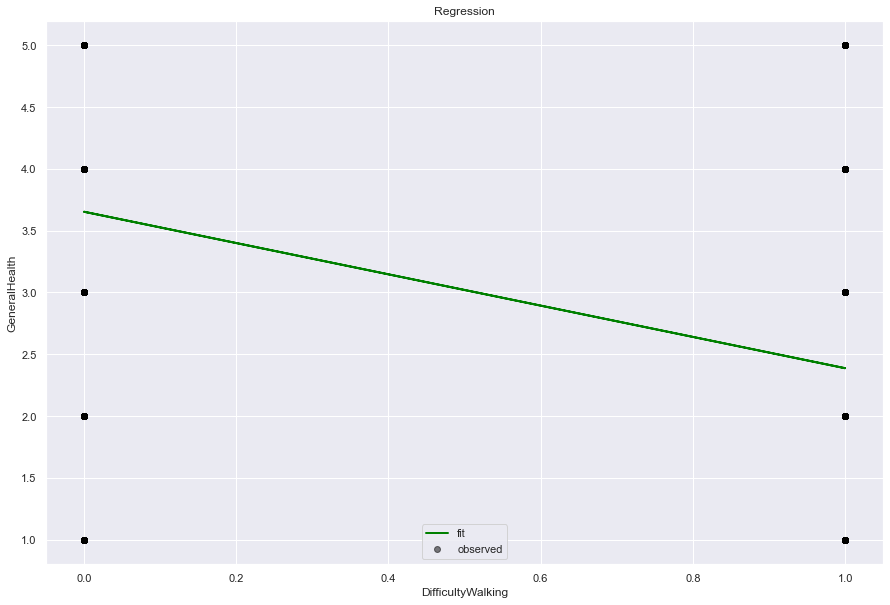

Coefficients =   [-1.26609205]
Intercept =   3.6530970064018624
Mean squared error = 0.90
Coefficient of determination = 0.19


In [37]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Simple Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score


X= train_df[['DifficultyWalking']]
y= train_df['GeneralHealth']

X_test = test_df[['DifficultyWalking']]
y_test = test_df['GeneralHealth']

X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X2, y)

# Model score
r_sq = model_1.score(X2, y)
print("The model Score is ", r_sq)

# Plotting the Regression Line with Scatter plot 
plt.scatter(X2, y, color='black', label='observed',alpha=0.5)
plt.plot(X2, model_1.predict(X2), label='fit', color='Green', linewidth=2)
plt.xlabel('DifficultyWalking')
plt.ylabel('GeneralHealth')
plt.title('Regression')
plt.legend(loc='best')

plt.show()


# Make predictions using the testing set
diabetes_y_pred = model_1.predict(X_test)

# The coefficients
print('Coefficients =  ', model_1.coef_)
print('Intercept =  ', model_1.intercept_)

# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, diabetes_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, diabetes_y_pred)))

In [38]:
# Make a prediction
X3= test_df['DifficultyWalking']
 
X3= np.array(X3).reshape(-1,1)
# what is the price for element 44 of the test house age list. 
predicted_charge = model_1.predict([X3[44]])
print('DifficultyWalking = {:.2f}   Predicted GeneralHealth = {:.2f}'.format(X3[44][0], predicted_charge[0]))

DifficultyWalking = 0.00   Predicted GeneralHealth = 3.65


### LINEAR REGRESSION MODEL 5 : Physical Health - BMI

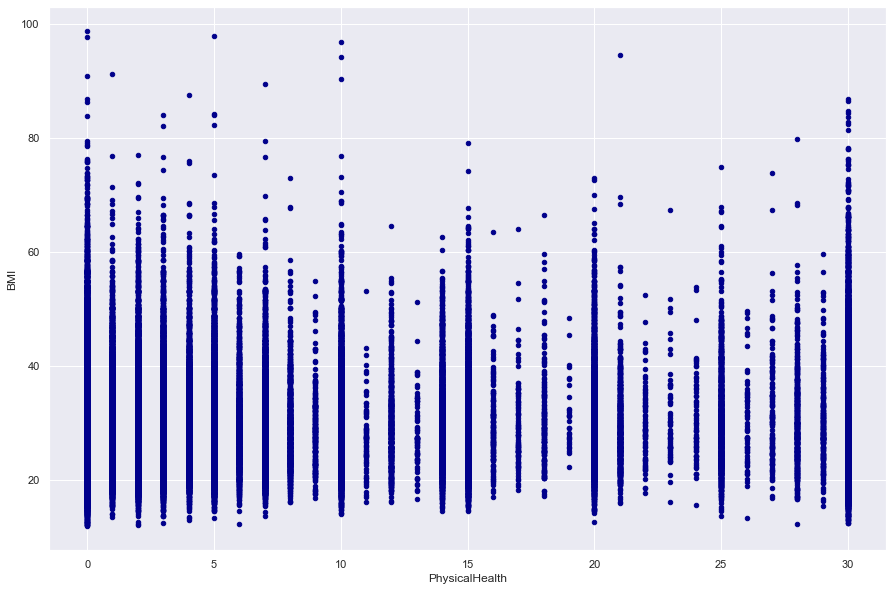

In [39]:
ax1 = diabetes.plot.scatter(x='PhysicalHealth',
                      y='BMI',
                      c='Darkblue')
plt.show()

The model Score is  0.015237910488188122


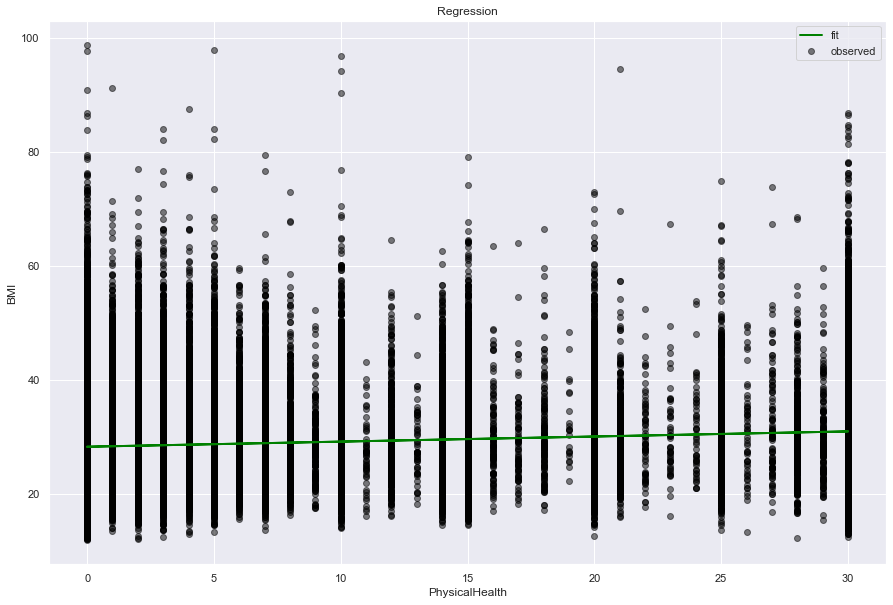

Coefficients =   [0.08961069]
Intercept =   28.28329131680311
Mean squared error = 39.70
Coefficient of determination = 0.01


In [40]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Simple Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score


X= train_df[['PhysicalHealth']]
y= train_df['BMI']

X_test = test_df[['PhysicalHealth']]
y_test = test_df['BMI']

X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(X2, y)

# Model score
r_sq = model_1.score(X2, y)
print("The model Score is ", r_sq)

# Plotting the Regression Line with Scatter plot 
plt.scatter(X2, y, color='black', label='observed',alpha=0.5)
plt.plot(X2, model_1.predict(X2), label='fit', color='Green', linewidth=2)
plt.xlabel('PhysicalHealth')
plt.ylabel('BMI')
plt.title('Regression')
plt.legend(loc='best')

plt.show()


# Make predictions using the testing set
diabetes_y_pred = model_1.predict(X_test)

# The coefficients
print('Coefficients =  ', model_1.coef_)
print('Intercept =  ', model_1.intercept_)

# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, diabetes_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, diabetes_y_pred)))

In [41]:
# Make a prediction
X3= test_df['PhysicalHealth']
 
X3= np.array(X3).reshape(-1,1)
# what is the price for element 44 of the test house age list. 
predicted_charge = model_1.predict([X3[44]])
print('PhysicalHealth = {:.2f}   Predicted BMI = {:.2f}'.format(X3[44][0], predicted_charge[0]))

PhysicalHealth = 2.00   Predicted BMI = 28.46


Note : GeneralHealth - BMI (looks like a parabola)

### MODEL 6 : POLYNOMIAL REGRESSION  WITH REGULARIZATION
- Physical Health vs BMI

In [42]:
x= diabetes_norm[['PhysicalHealth']]
y= diabetes_norm['BMI']
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
data.head()

,x,y
0,0.500000,0.186505
1,0.333333,0.075433
2,0.000000,0.226298
3,1.000000,0.241984
4,0.666667,0.053633


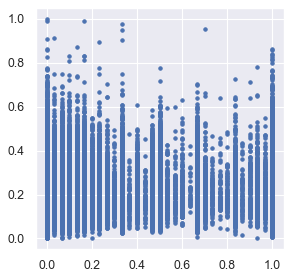

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)
plt.plot(data['x'],data['y'],'.')
plt.show()

In [44]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  0.500000  0.186505  0.250000  0.125000  0.062500  0.031250  0.015625   
1  0.333333  0.075433  0.111111  0.037037  0.012346  0.004115  0.001372   
2  0.000000  0.226298  0.000000  0.000000  0.000000  0.000000  0.000000   
3  1.000000  0.241984  1.000000  1.000000  1.000000  1.000000  1.000000   
4  0.666667  0.053633  0.444444  0.296296  0.197531  0.131687  0.087791   

        x_7       x_8       x_9      x_10      x_11      x_12          x_13  \
0  0.007812  0.003906  0.001953  0.000977  0.000488  0.000244  1.220703e-04   
1  0.000457  0.000152  0.000051  0.000017  0.000006  0.000002  6.272255e-07   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
4  0.058528  0.039018  0.026012  0.017342  0.011561  0.007707  5.138231e-03   

           x_14          x_15  
0  6.103516e-05  3.051758e-05  
1  2.09075

#### Without Regularization

In [45]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

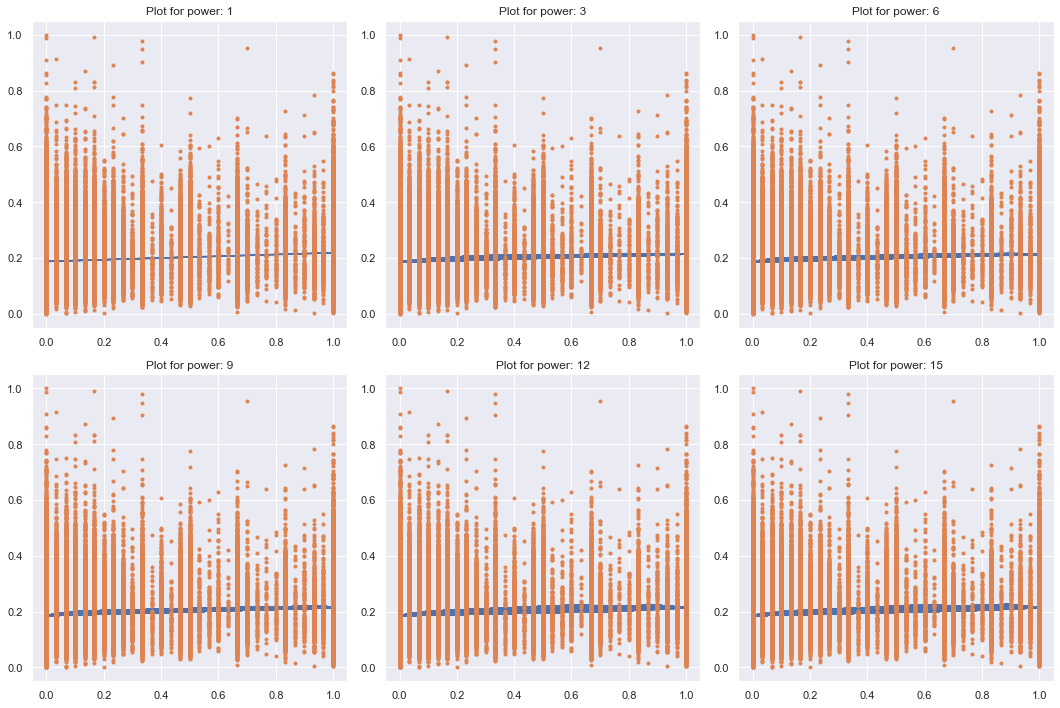

In [46]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [47]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,1.3e+03,0.19,0.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,1.3e+03,0.19,0.083,-0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.3e+03,0.19,0.13,-0.21,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.3e+03,0.19,0.18,-0.6,0.86,-0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.3e+03,0.19,0.22,-1.1,2.4,-2.5,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.3e+03,0.19,0.24,-1.4,4.2,-6.3,4.7,-1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.3e+03,0.19,0.2,-0.45,-2.7,16,-32,27,-8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,1.3e+03,0.19,0.19,-0.17,-5.3,28,-60,64,-33,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,1.3e+03,0.19,0.11,2.4,-35,2e+02,-5.8e+02,1e+03,-1e+03,5.4e+02,-1.2e+02,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,1.3e+03,0.19,-0.082,11,-1.6e+02,1.1e+03,-4.5e+03,1.1e+04,-1.7e+04,1.5e+04,-7.5e+03,1.6e+03,NaN,NaN,NaN,NaN,NaN


#### With Regularization

In [48]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model 
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

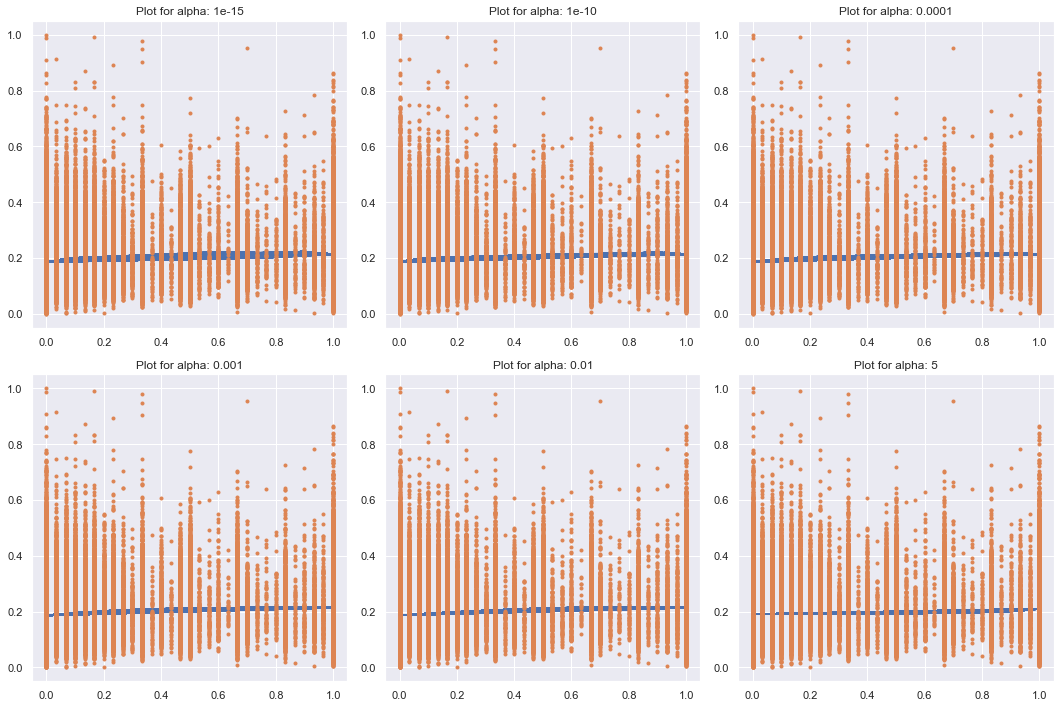

In [49]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [50]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.3e+03,0.19,0.0023,6.1,-75,3.4e+02,-4e+02,-1.7e+03,6.2e+03,-5.8e+03,-3.3e+03,6.2e+03,3.6e+03,-5.7e+03,-4.4e+03,7.5e+03,-2.5e+03
alpha_1e-10,1.3e+03,0.19,0.22,-0.93,1.3,2,-11,18,-0.78,-19,-8,14,21,5.3,-19,-24,21
alpha_1e-08,1.3e+03,0.19,0.21,-0.89,1.1,0.86,-1.2,-1.3,-0.31,0.74,1.3,1.1,0.19,-0.94,-1.6,-0.94,1.6
alpha_0.0001,1.3e+03,0.19,0.13,-0.24,0.074,0.098,0.043,-0.0022,-0.025,-0.031,-0.027,-0.019,-0.0093,-0.00072,0.0062,0.011,0.014
alpha_0.001,1.3e+03,0.19,0.098,-0.092,-0.02,0.013,0.02,0.017,0.012,0.0074,0.0033,8.1e-05,-0.0025,-0.0046,-0.0063,-0.0077,-0.0089
alpha_0.01,1.3e+03,0.19,0.062,-0.015,-0.014,-0.008,-0.0036,-0.0011,0.00026,0.00096,0.0013,0.0013,0.0012,0.00098,0.00072,0.00044,0.00014
alpha_1,1.3e+03,0.19,0.0089,0.0045,0.0027,0.0018,0.0013,0.00096,0.00076,0.00062,0.00051,0.00044,0.00038,0.00034,0.0003,0.00027,0.00025
alpha_5,1.3e+03,0.19,0.0029,0.002,0.0016,0.0013,0.0012,0.0011,0.0011,0.001,0.001,0.001,0.00099,0.00097,0.00096,0.00095,0.00095
alpha_10,1.3e+03,0.19,0.0018,0.0014,0.0012,0.0011,0.00099,0.00095,0.00093,0.00091,0.00089,0.00088,0.00087,0.00087,0.00086,0.00086,0.00085
alpha_20,1.3e+03,0.19,0.0011,0.00089,0.0008,0.00075,0.00071,0.00069,0.00068,0.00067,0.00066,0.00066,0.00065,0.00065,0.00065,0.00065,0.00064


Note: Even after trying various polynomial degree there is no improvement in the model score. The Regression line is flat and not able to model the data properly. Thus the model model has very high bias and even with very high degree polynomial features no results can be seen. This also implies that the regularization is not not playing any role in improving the model.

### MODEL 6: DECISION TREE REGRESSOR

In [51]:
from sklearn.tree import DecisionTreeRegressor

train_norm_df, test_norm_df = train_test_split(diabetes_norm,shuffle = True, test_size = 0.20, random_state=17)

X = train_norm_df[['PhysicalHealth']] #Two-dimensional (pd DataFrame)
y = train_norm_df['BMI'] #One-dimensional (pd Series)

X_test = test_norm_df[['PhysicalHealth']] #Two-dimensional (pd DataFrame)
y_test = test_norm_df['BMI'] #One-dimensional (pd Series)


#### Decision Tree Regressor with Max depth 2

Model Score = 0.01749066762038165
Mean squared error = 0.01
Coefficient of determination = 0.02


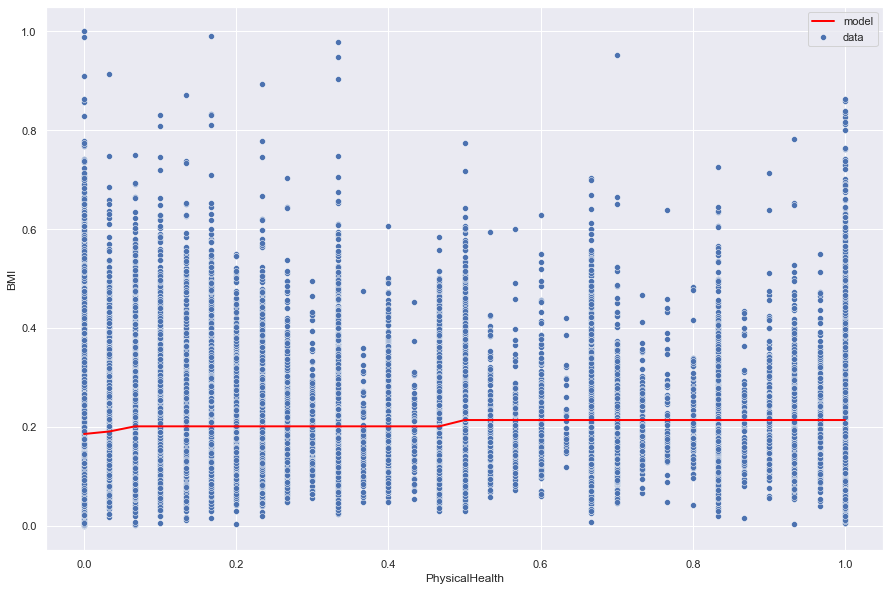

In [52]:
#Create an object (model)
dtr1 = DecisionTreeRegressor(max_depth=2,
                             random_state=1)

#Fit (train) the model
dtr1.fit(X, y)

sns.scatterplot(x=diabetes_norm['PhysicalHealth'],
                y=diabetes_norm['BMI'],
                label='data')

plt.plot(diabetes_norm['PhysicalHealth'].sort_values(),       
         dtr1.predict(diabetes_norm['PhysicalHealth'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()

plt.savefig('model.png')

# Make predictions using the testing set
y_pred = dtr1.predict(X_test)


print("Model Score = {}".format(dtr1.score(X_test,y_test)))


# The mean squared error
print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, y_pred)))

#### Trying Higher Max Depth 

In [53]:
def vary_max_depth_dtr(max_dp):
    dtr = DecisionTreeRegressor(max_depth=max_dp,random_state=1)
    dtr.fit(X, y)
    sns.scatterplot(x=diabetes_norm['PhysicalHealth'],
                y=diabetes_norm['BMI'],
                label='data')
    plt.plot(diabetes_norm['PhysicalHealth'].sort_values(),       
         dtr1.predict(diabetes_norm['PhysicalHealth'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
    plt.legend()
    # Make predictions using the testing set
    y_pred = dtr.predict(X_test)
    print("Model Score = {}".format(dtr.score(X_test,y_test)))
    # The mean squared error
    print('Mean squared error = {:.2f}'.format( mean_squared_error(y_test, y_pred)))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination = {:.2f}'.format(r2_score(y_test, y_pred)))


Model Score = 0.017697774729233617
Mean squared error = 0.01
Coefficient of determination = 0.02


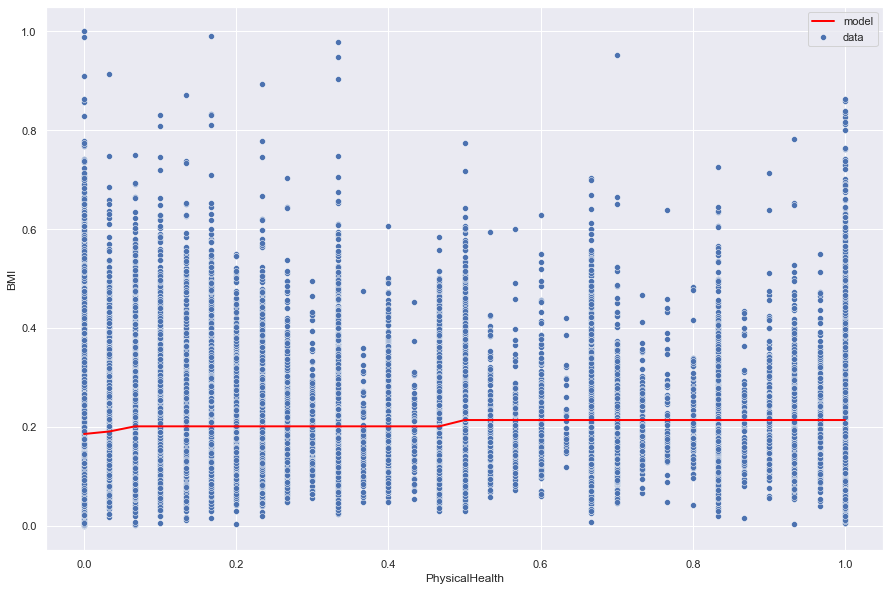

In [54]:
#max depth set to 3
vary_max_depth_dtr(3)

Model Score = 0.017786213528891537
Mean squared error = 0.01
Coefficient of determination = 0.02


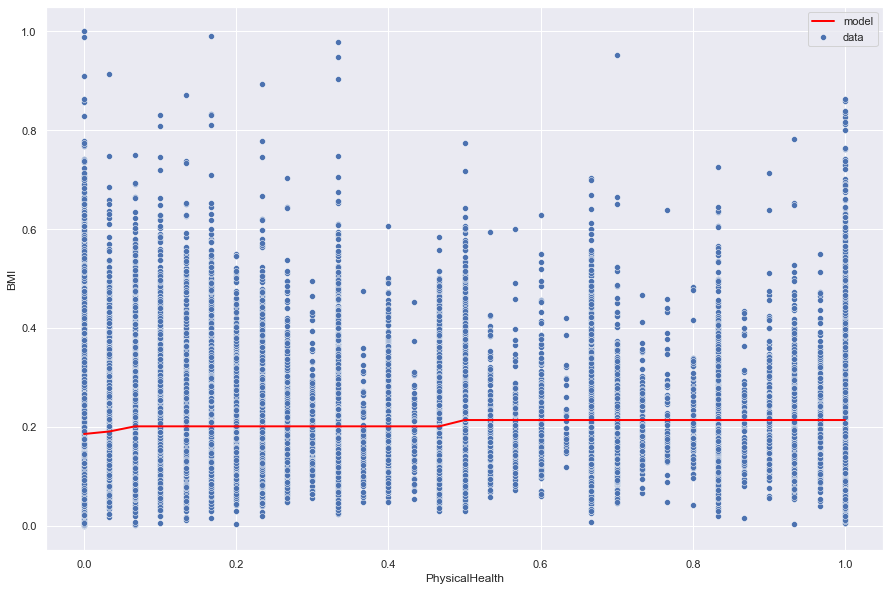

In [55]:
# max depth set to 5
vary_max_depth_dtr(5)

Model Score = 0.017569950004698076
Mean squared error = 0.01
Coefficient of determination = 0.02


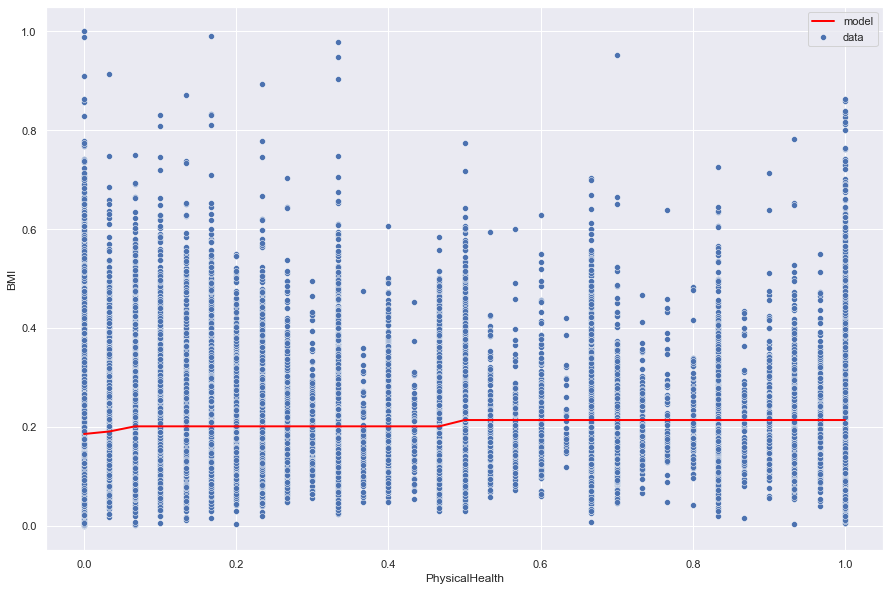

In [56]:
# max depth set to 7
vary_max_depth_dtr(7)

Notes:  Using Decision tree regressor and increasing the hyper parameter max depth is not changing the results. The model gets a score of 0.02 across all the decision tree models that we have created.

# Conclusion
- Normalization of entire dataset due to varying ranges of different attributes. Since the predictor variables had varying ranges, we normalized them with MinMaxScaler. Looking at normalized pairplots,
  we observed a few correlations which earlier were obscured by noise.
- We did correlation analysis and heatmaps for the normalized data as well.
- We selected most prospective attributes for building regression models with higher correlation
- Below are our observations on linear regression models:-
   1. Physical Health - General Health <br>
   The model score is around 0.28 for non-normalized data as well as normalized data which was the highest for any combination of attributes.
   We get same results for normalized and non-normalized data since we are using one feature.
   2. General Health - BMI <br>
   The observed model score is apx. 0.06. It might have a better chance at non-linear models
   3. Age - BMI <br>
   The variables dont seem to have a linear correlation again and might perform better with a non-linear model.
   4. Difficulty Walking - General Health <br>
   The model score is apx. 0.20 
   5. Physical Health - BMI <br>
   The combination is not linearly correlated with model score of 0.015 <br>
- We tried to evaluate the linear models performance metrics using Coefficient & Intercept, Model Score, Mean Squared Error(MSE), Coefficient of determination.
- We tried to perform polynomial regression between Physical Health - BMI. Based on our observations from the polynomial regression with/without regularization we did not see any significant improvement in the models prediction.The Regression line is flat even with high degree polynomial and not able to model the data properly. Thus the model has very high bias and even with very high degree polynomial features no results can be seen. 
- We tried to perform decision tree regression between Physical Health - BMI. We tried different  max depths = 2,3,5 and 7. Here the max model score achieved is 0.017 which again is not much of an improvement from 0.015 in the linear regression model 

#### Looking at all the models we see that the attributes which has highest correlation (pearson correlation coefficient) that is Physical Health - General (-0.525) also has the best model score in the linear regression model (0.28). Similar trend is observed for other combinations. 

#### Since the results do not have a high degree of correlation, hence the features need to be evaluated differently using hyperplanes, multi-variate regression, or more advanced algorithmns (random forest, Neural networks,etc.).

# --END--